In [10]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

In [14]:
attendance_df = pd.read_csv("data/nba_2017_attendance.csv")
endorsement_df = pd.read_csv("data/nba_2017_endorsements.csv")
valuations_df = pd.read_csv("data/nba_2017_team_valuations.csv")
salary_df = pd.read_csv("data/nba_2017_salary.csv")
pie_df = pd.read_csv("data/nba_2017_pie.csv")
plus_minus_df = pd.read_csv("data/nba_2017_real_plus_minus.csv")
br_stats_df = pd.read_csv("data/nba_2017_br.csv")
elo_df = pd.read_csv("data/nba_2017_elo.csv")

In [30]:
help(attendance_df.describe)

Help on method describe in module pandas.core.generic:

describe(self, percentiles=None, include=None, exclude=None) method of pandas.core.frame.DataFrame instance
    Generates descriptive statistics that summarize the central tendency,
    dispersion and shape of a dataset's distribution, excluding
    ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignored
        for ``Series``. Here are the options:
  

In [28]:
attendance_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680
1,Dallas Mavericks,41,103,0.811366,0.019789
2,Sacramento Kings,41,101,0.721928,0.017608
3,Miami Heat,41,100,0.805400,0.019643
4,Toronto Raptors,41,100,0.813050,0.019830


In [20]:
endorsement_df.head()

,NAME,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,LeBron James,Cleveland Cavaliers,31,55
1,Kevin Durant,Golden State Warriors,27,36
2,Stephen Curry,Golden State Warriors,12,35
3,James Harden,Houston Rockets,27,20
4,Russell Westbrook,Oklahoma City Thunder,27,15


In [21]:
valuations_df.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


In [22]:
salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [23]:
pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [24]:
plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [25]:
br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [26]:
elo_df.head()

,ELO,TEAM,CONF
0,1770,Golden State Warriors,West
1,1661,San Antonio Spurs,West
2,1636,Los Angeles Clippers,West
3,1617,Utah Jazz,West
4,1602,Houston Rockets,West


In [31]:
attendance_valuation_df = attendance_df.merge(valuations_df, how="inner", on="TEAM")
attendance_valuation_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0
3,Miami Heat,41,100,0.805400,0.019643,1350.0
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0


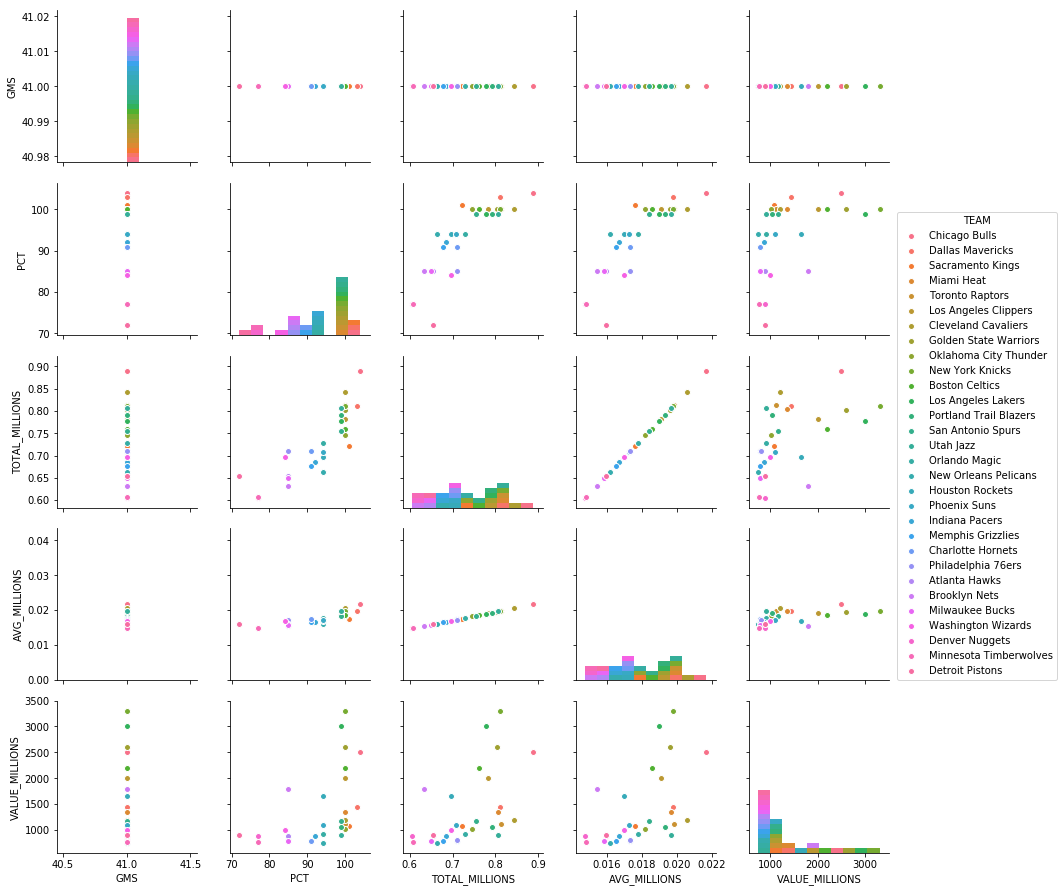

In [32]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(attendance_valuation_df, hue="TEAM")

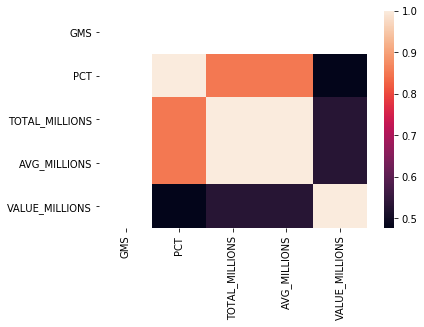

In [33]:
corr = attendance_valuation_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [35]:
list(attendance_valuation_df)

['TEAM', 'GMS', 'PCT', 'TOTAL_MILLIONS', 'AVG_MILLIONS', 'VALUE_MILLIONS']

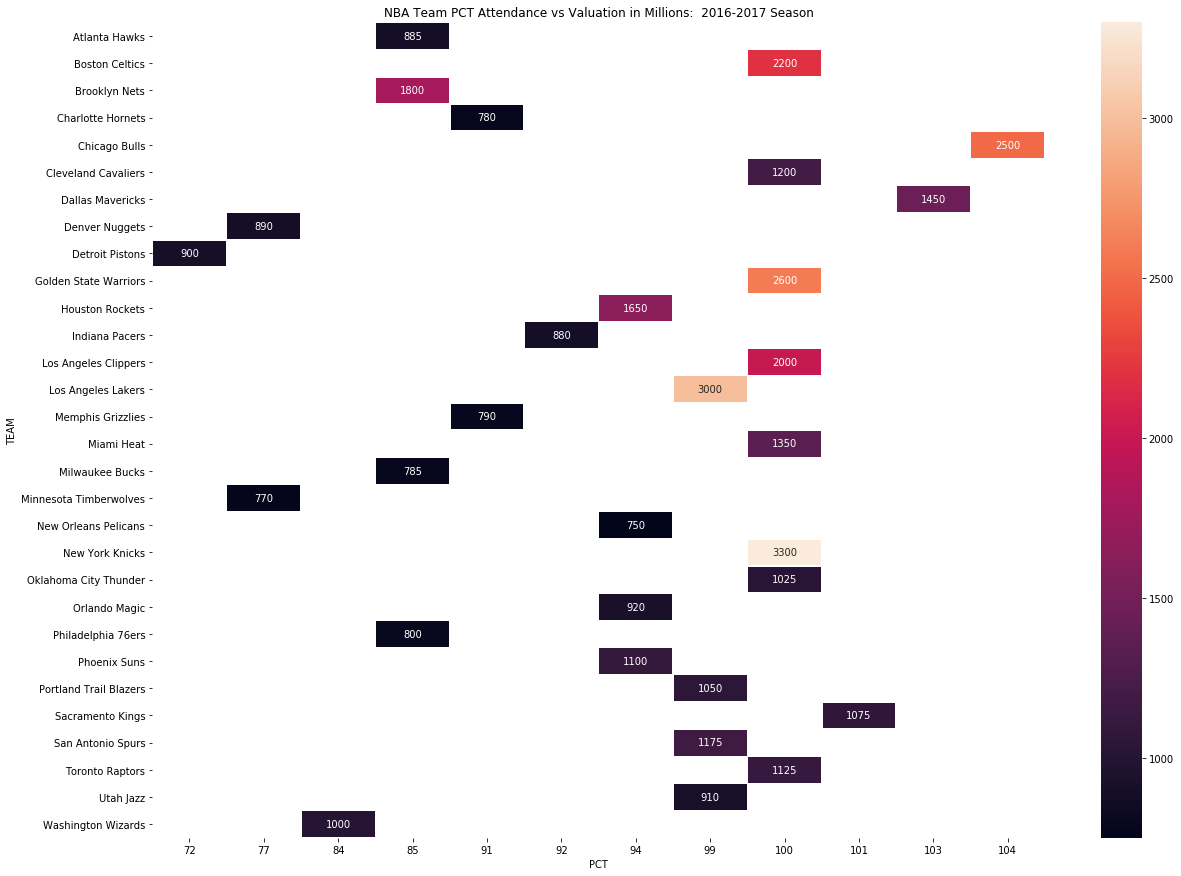

In [36]:
valuations = attendance_valuation_df.pivot("TEAM", "PCT", "VALUE_MILLIONS")
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Team PCT Attendance vs Valuation in Millions:  2016-2017 Season")
sns.heatmap(valuations,linewidths=.5, annot=True, fmt='g')

In [38]:
results = smf.ols('VALUE_MILLIONS ~PCT', data=attendance_valuation_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     8.231
Date:                Wed, 29 Nov 2017   Prob (F-statistic):            0.00775
Time:                        13:47:02   Log-Likelihood:                -235.14
No. Observations:                  30   AIC:                             474.3
Df Residuals:                      28   BIC:                             477.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2344.3423   1294.715     -1.811      0.0

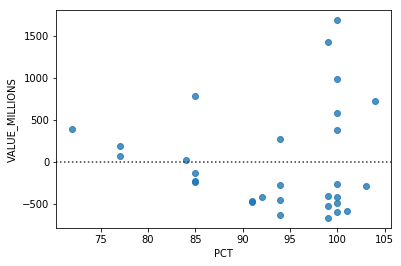

In [40]:
sns.residplot(y='VALUE_MILLIONS', x='PCT', data=attendance_valuation_df)

CONF
East    92
West    99
Name: PCT, dtype: int64

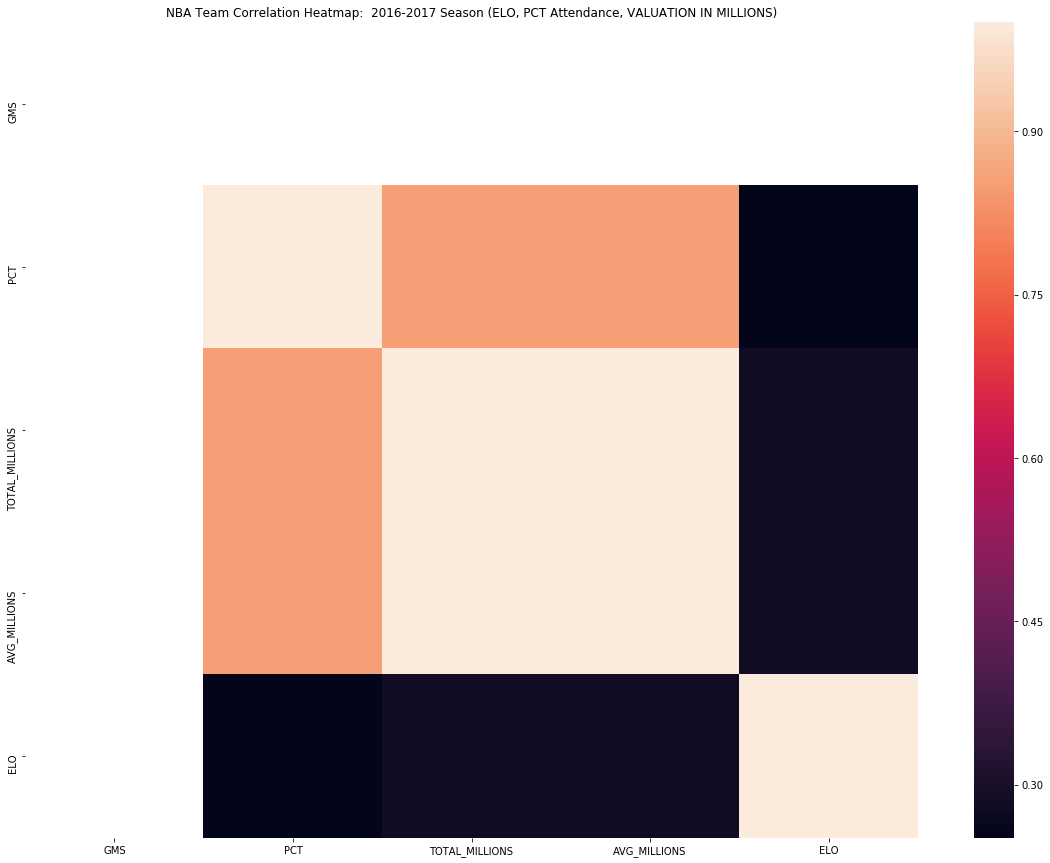

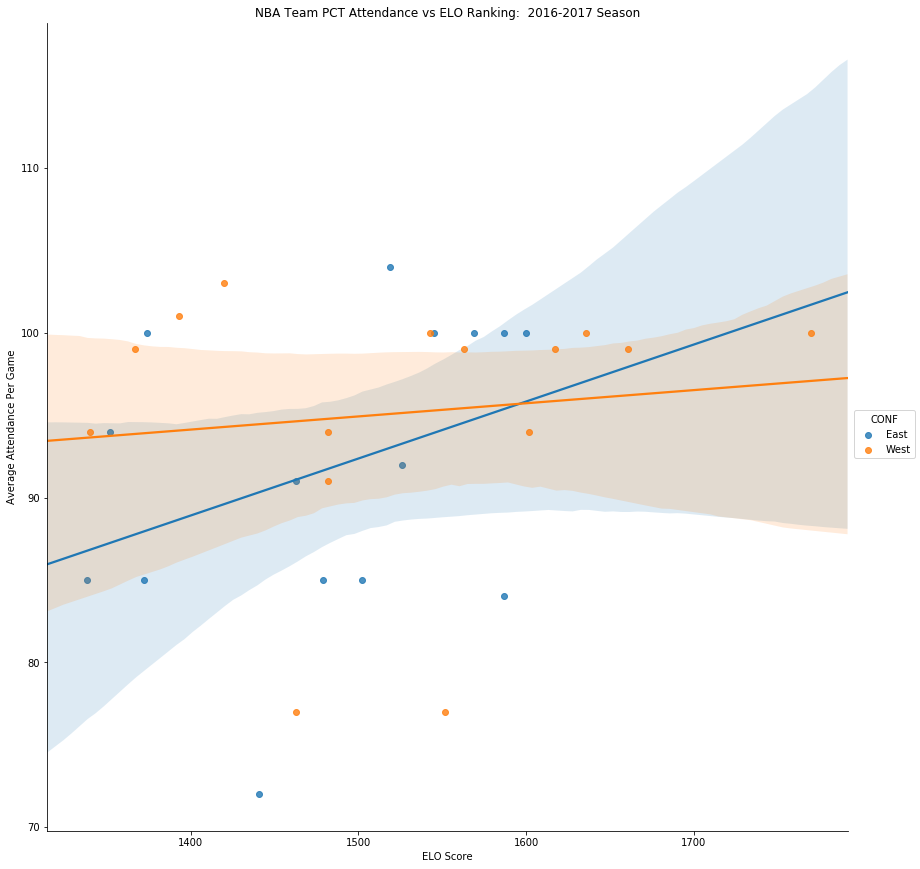

In [44]:
attendance_valuation_elo_df = attendance_df.merge(elo_df, how="inner", on="TEAM")
attendance_valuation_elo_df.head()
attendance_valuation_elo_df.to_csv("data/nba_2017_att_val_elo.csv")
corr_elo = attendance_valuation_elo_df.corr()
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Team Correlation Heatmap:  2016-2017 Season (ELO, PCT Attendance, VALUATION IN MILLIONS)")
sns.heatmap(corr_elo, 
            xticklabels=corr_elo.columns.values,
            yticklabels=corr_elo.columns.values)
corr_elo
ax = sns.lmplot(x="ELO", y="PCT", data=attendance_valuation_elo_df, hue="CONF", size=12)
ax.set(xlabel='ELO Score', ylabel='Average Attendance Per Game', title="NBA Team PCT Attendance vs ELO Ranking:  2016-2017 Season")
attendance_valuation_elo_df.groupby("CONF")["ELO"].median()
attendance_valuation_elo_df.groupby("CONF")["PCT"].median()


In [45]:
results = smf.ols('PCT ~ELO', data=attendance_valuation_elo_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    PCT   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.885
Date:                Wed, 29 Nov 2017   Prob (F-statistic):              0.181
Time:                        13:56:03   Log-Likelihood:                -105.44
No. Observations:                  30   AIC:                             214.9
Df Residuals:                      28   BIC:                             217.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.2412     22.069      2.866      0.0